In [2]:
%matplotlib inline
#Modified by Mehul Motani from SKLearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time

C:\Users\power\AppData\Local\Temp\ipykernel_12820\77010446.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


digits.data.shape,digits.target.shape,digits.images.shape
(1797, 64) (1797,) (1797, 8, 8)


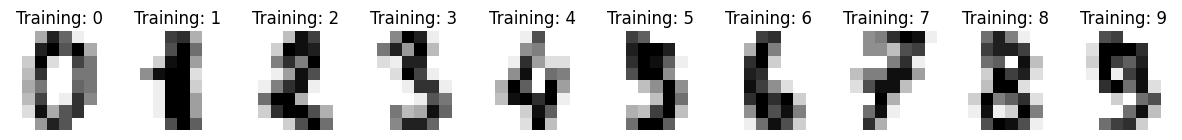

In [3]:
#plot the digits to find the hardest recognition one
digits = datasets.load_digits()

#digits.data flattened image
#digits.image 8x8 image
#digits.target label

print("digits.data.shape,digits.target.shape,digits.images.shape")
print(digits.data.shape,digits.target.shape,digits.images.shape)
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

<font color=black size=5 face=arial>** SVM, Naïve Bayes and Logistic Regression classifiers **</font>

SVM needs standard normalization

0.9666666666666667 SVC()
Confusion matrix:
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  2  0  0  1  0  0]
 [ 0  0  1 45  0  1  0  1  0  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  1  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  1  1  2 35]]


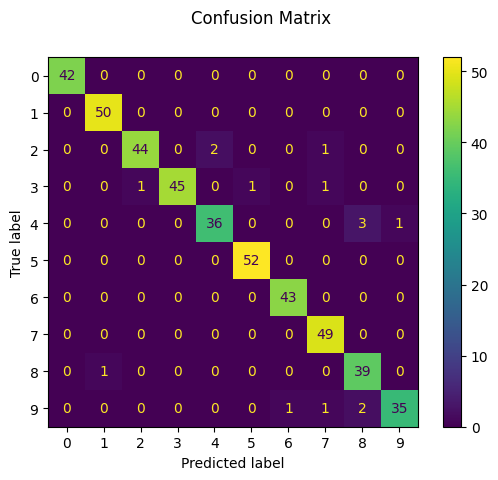

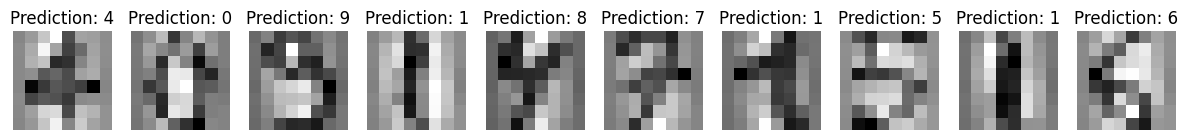

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.98      1.00      0.99        50
           2       0.98      0.94      0.96        47
           3       1.00      0.94      0.97        48
           4       0.95      0.90      0.92        40
           5       0.98      1.00      0.99        52
           6       0.98      1.00      0.99        43
           7       0.94      1.00      0.97        49
           8       0.89      0.97      0.93        40
           9       0.97      0.90      0.93        39

    accuracy                           0.97       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.97      0.97       450


0.9444444444444444 LogisticRegression(max_iter=5000)
Confusion matrix:
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  1  0  2  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 43  0  2  0  1 

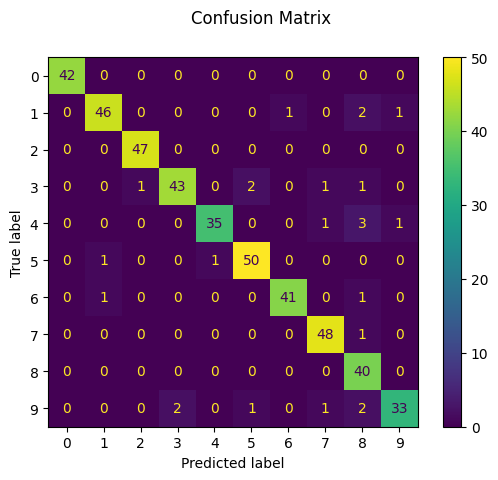

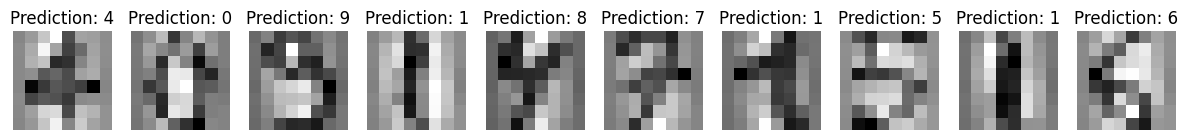

Classification report for classifier LogisticRegression(max_iter=5000):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.96      0.92      0.94        50
           2       0.98      1.00      0.99        47
           3       0.96      0.90      0.92        48
           4       0.97      0.88      0.92        40
           5       0.94      0.96      0.95        52
           6       0.98      0.95      0.96        43
           7       0.94      0.98      0.96        49
           8       0.80      1.00      0.89        40
           9       0.94      0.85      0.89        39

    accuracy                           0.94       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.95      0.94      0.94       450


0.8288888888888889 GaussianNB()
Confusion matrix:
[[41  0  0  0  1  0  0  0  0  0]
 [ 0 36  1  0  0  0  2  5  2  4]
 [ 0  0 41  0  1  0  1  0  4  0]
 [ 0  0  3 36  0  2

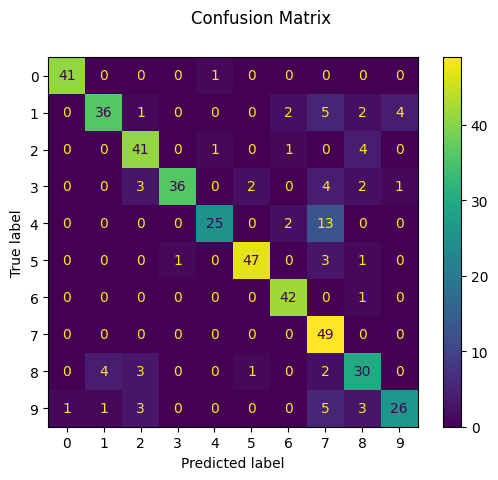

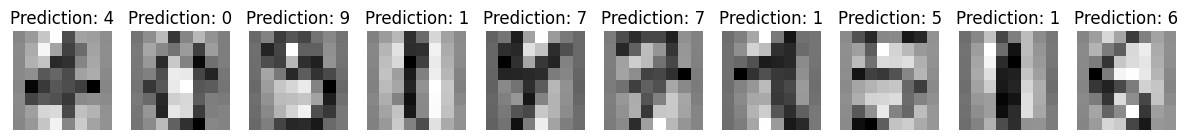

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.88      0.72      0.79        50
           2       0.80      0.87      0.84        47
           3       0.97      0.75      0.85        48
           4       0.93      0.62      0.75        40
           5       0.94      0.90      0.92        52
           6       0.89      0.98      0.93        43
           7       0.60      1.00      0.75        49
           8       0.70      0.75      0.72        40
           9       0.84      0.67      0.74        39

    accuracy                           0.83       450
   macro avg       0.85      0.82      0.83       450
weighted avg       0.85      0.83      0.83       450




In [4]:
svc = svm.SVC()
lr = linear_model.LogisticRegression(max_iter=5000)
gnb = GaussianNB()

# Split the data into 75% training and 25% test sets
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=2, shuffle=True)

# Normalize the data set
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
X_test = sc.transform(x_test)

# Classify
for clf in [svc, lr, gnb]:
  y_pred=clf.fit(X_train, y_train).predict(X_test)
  print(metrics.accuracy_score(y_pred,y_test),clf)
  disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  disp.figure_.suptitle("Confusion Matrix")
  print(f"Confusion matrix:\n{disp.confusion_matrix}")
  plt.show()
  _, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
  for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")
  plt.show()
  print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
  )

In [5]:
monte=100
Accuracy=np.zeros([monte,3])
for i in range(1,monte):
    k=0
    # Split the data into 75% training and 25% test sets
    x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=2, shuffle=True)

    # Normalize the data set
    sc = StandardScaler()
    sc.fit(x_train)
    X_train = sc.transform(x_train)
    X_test = sc.transform(x_test)
    for clf in [svc, lr, gnb]:
      y_pred=clf.fit(X_train, y_train).predict(X_test)
      Accuracy[i,k]=metrics.accuracy_score(y_pred,y_test)
      k+=1
        
avg_SVC=np.mean(Accuracy[:,0])
avg_LoR=np.mean(Accuracy[:,1])
avg_GNB=np.mean(Accuracy[:,2])
print("cycle%d"%monte+"times with average accuracy in SVC:%f"%avg_SVC+
      " LogisticRegression:%f"%avg_LoR+" Gaussion:%f"%avg_GNB)    


cycle100times with average accuracy in SVC:0.957000 LogisticRegression:0.935000 Gaussion:0.820600
